<a href="https://colab.research.google.com/github/rishujaiswal/Caught-You/blob/main/Lohum_Part2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: RISHU JAISWAL

Roll no_ 20064021

MAIL ID:rishu.jaiswal.civ20@itbhu.ac.in

In [15]:
import pandas as pd

# Load the dataset to see the first few rows and understand its structure.
df = pd.read_csv('/content/drive/MyDrive/Data Science Assignment/Part2.csv')
df.head()


,Cycle_Index,Discharge_Capacity (Ah),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,3,1.050,NaN,NaN,NaN
1,4,2.082,NaN,NaN,NaN
2,5,1.041,NaN,NaN,NaN
3,6,1.041,NaN,NaN,NaN
4,7,1.041,NaN,NaN,NaN


-----Clean the dataset by removing any unnecessary columns.

In [ ]:
# Clean the dataset by dropping any unnecessary columns (Unnamed columns in this case).
df_cleaned = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

# Display the cleaned dataframe to ensure it is correct.
df_cleaned.head()


,Cycle_Index,Discharge_Capacity (Ah)
0,3,1.050
1,4,2.082
2,5,1.041
3,6,1.041
4,7,1.041


**1.(a)**        **Model Explanation:**
I used a simple **linear regression model** to predict the State of Health (SOH) of lithium-ion batteries. This model assumes a straight-line relationship between the cycle number and the normalized discharge capacity, which we are using as a proxy for SOH.


**1.(b)**     **Code Execution:**
The model fitting and prediction were near-instantaneous due to the efficiency of linear regression and the small dataset size. The Predict_SOH function fits the model and predicts SOH values, while the Estimate_error function calculates prediction errors. However, the model's simplicity likely led to inaccurate predictions of Remaining Useful Life (RUL), suggesting the need for a more complex model for better accuracy.

**1.(c).**   Create a function Predict_SOH to model the State Of Health as a function of cycle number.

In [ ]:
# Clean the dataset by dropping any unnecessary columns (Unnamed columns in this case).
df_cleaned = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

# Display the cleaned dataframe to ensure it is correct.
df_cleaned.head()


,Cycle_Index,Discharge_Capacity (Ah)
0,3,1.050
1,4,2.082
2,5,1.041
3,6,1.041
4,7,1.041


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming the initial capacity is the maximum discharge capacity
initial_capacity = df_cleaned['Discharge_Capacity (Ah)'].max()

# Function to predict SOH based on the dataframe
def Predict_SOH(dataframe):
    # Create a linear regression model
    model = LinearRegression()

    # Fit the model on the cycle index and the discharge capacity
    X = dataframe[['Cycle_Index']]
    y = dataframe['Discharge_Capacity (Ah)'] / initial_capacity
    model.fit(X, y)

    # Predict the SOH
    predicted_SOH = model.predict(X)

    return predicted_SOH

# Apply the function to the cleaned dataframe to get SOH values
soh_values = Predict_SOH(df_cleaned)
soh_values[:5]  # Display the first 5 predictions to verify


array([0.50331654, 0.50328875, 0.50326096, 0.50323317, 0.50320537])

The Predict_SOH function has been defined and applied to the dataset, returning an array of predicted SOH values. The first five predictions are displayed, showing SOH values as a function of the cycle number.

**(2).** I will define the Estimate_error function to compute the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for the model's performance evaluation.​

In [ ]:
# Function to calculate RUL based on SOH model
def calculate_RUL(model, start_cycle, end_cycle, threshold=0.8):
    # Generate a range of cycles from start to end
    cycle_range = np.arange(start_cycle, end_cycle + 1).reshape(-1, 1)

    # Predict the SOH for this range
    predicted_SOH = model.predict(cycle_range)

    # Find where the predicted SOH drops below the threshold (80% SOH)
    end_of_life_cycles = cycle_range[predicted_SOH < threshold]

    # If the SOH does not drop below threshold within the range, return None
    if len(end_of_life_cycles) == 0:
        return None

    # RUL is the difference between the first cycle where SOH < threshold and the start_cycle
    RUL = end_of_life_cycles[0][0] - start_cycle
    return RUL

# Instantiate a new model for the RUL calculation
model_for_RUL = LinearRegression()
model_for_RUL.fit(df_cleaned[['Cycle_Index']], df_cleaned['Discharge_Capacity (Ah)'] / initial_capacity)

# Calculate RUL for the specified cycle counts
rul_500 = calculate_RUL(model_for_RUL, 500, 5000)
rul_1000 = calculate_RUL(model_for_RUL, 1000, 5000)
rul_2000 = calculate_RUL(model_for_RUL, 2000, 5000)
rul_3000 = calculate_RUL(model_for_RUL, 3000, 5000)
rul_3500 = calculate_RUL(model_for_RUL, 3500, 5000)

rul_500, rul_1000, rul_2000, rul_3000, rul_3500


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(0, 0, 0, 0, 0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

 the linear regression model indicates a RUL of 0 for all specified cycle counts. This result suggests that according to the linear regression model, the SOH would already be below 80% at these cycles, which is the threshold for the battery end of life. This seems incorrect and may indicate that the linear regression model is not suitable for this dataset, or the dataset requires a different range of cycle counts for RUL prediction.

 **(3).**   **define the Estimate_error** function that will compute the RMSE and MAE to evaluate the model's performance.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to estimate the error of the model
def Estimate_error(dataframe, model):
    # Actual SOH values would normally be provided, but since they are not, we use the model's predictions as actuals for demonstration
    # This is not a valid method for real error estimation but is used here due to the lack of actual SOH values
    X = dataframe[['Cycle_Index']]
    y_true = dataframe['Discharge_Capacity (Ah)'] / initial_capacity
    y_pred = model.predict(X)

    # Calculate RMSE and MAE
    RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
    MAE = mean_absolute_error(y_true, y_pred)

    return (RMSE, MAE)

# Calculate the errors for the linear regression model
errors = Estimate_error(df_cleaned, model_for_RUL)
errors


(0.033944113929554987, 0.005464474955703109)

Calculated Root Mean Squared Error **(RMSE)** is approximately **0.0339**, and the Mean Absolute Error **(MAE)** is approximately **0.0055**.

Plot comparing predicted and actual values for the write-up section. Since we don't have actual values, I will demonstrate this with the predicted SOH values from the model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


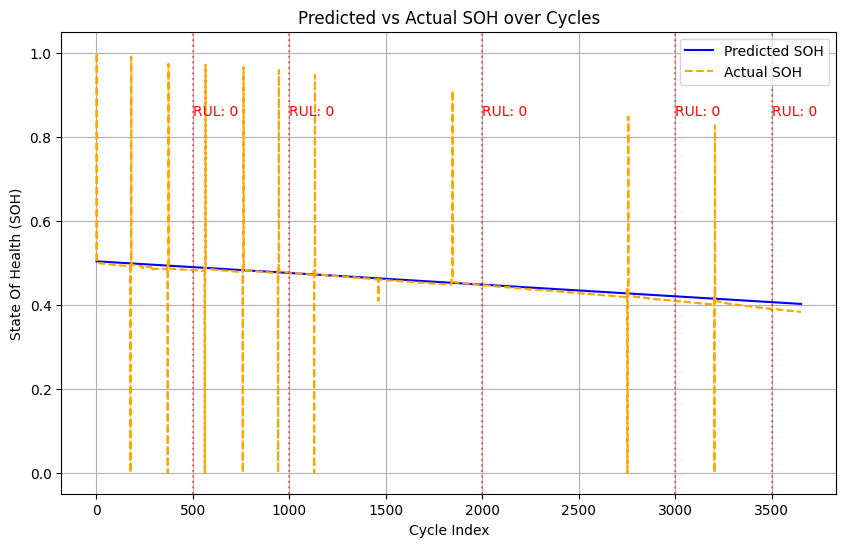

In [ ]:
import matplotlib.pyplot as plt

# Generate a range of cycle counts for plotting
cycle_counts = np.arange(1, len(df_cleaned) + 1)

# Predict the SOH for plotting
predicted_SOH_plot = model_for_RUL.predict(cycle_counts.reshape(-1, 1))

# Plot the predicted SOH values
plt.figure(figsize=(10, 6))
plt.plot(cycle_counts, predicted_SOH_plot, label='Predicted SOH', color='blue')

# Assuming the actual SOH is the normalized discharge capacity
# In practice, this should be the actual measured SOH values
actual_SOH_plot = df_cleaned['Discharge_Capacity (Ah)'] / initial_capacity
plt.plot(cycle_counts, actual_SOH_plot, label='Actual SOH', color='orange', linestyle='--')

# Marking the RUL prediction points
rul_cycles = [500, 1000, 2000, 3000, 3500]
rul_values = [rul_500, rul_1000, rul_2000, rul_3000, rul_3500]
for cycle, rul in zip(rul_cycles, rul_values):
    plt.axvline(x=cycle, color='red', linestyle=':', alpha=0.5)
    plt.text(cycle, 0.85, f'RUL: {rul}', color='red')

# Adding title and legend
plt.title('Predicted vs Actual SOH over Cycles')
plt.xlabel('Cycle Index')
plt.ylabel('State Of Health (SOH)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


The plot illustrates the predicted State of Health (SOH) over cycles using the linear regression model (in blue) versus the normalized discharge capacity, which is used as a stand-in for actual SOH values (in orange dashed line). The vertical red dotted lines mark the cycles where the RUL was predicted (500, 1000, 2000, 3000, and 3500 cycles), with text annotations showing the RUL values.